In [12]:
# Print correlation with target variable
print(phishing_data.corr()['Result'].sort_values())   

Domain_registeration_length    -0.225789
Shortining_Service             -0.067966
Abnormal_URL                   -0.060488
HTTPS_token                    -0.039854
double_slash_redirecting       -0.038608
Redirect                       -0.020113
Iframe                         -0.003394
Favicon                        -0.000280
popUpWidnow                     0.000086
RightClick                      0.012653
Submitting_to_email             0.018249
Links_pointing_to_page          0.032574
port                            0.036419
on_mouseover                    0.041838
having_At_Symbol                0.052948
URLURL_Length                   0.057430
DNSRecord                       0.075718
Statistical_report              0.079857
having_IPhaving_IP_Address      0.094160
Page_Rank                       0.104645
age_of_domain                   0.121496
Google_Index                    0.128950
SFH                             0.221419
Links_in_tags                   0.248229
Request_URL     

In [13]:
# First, we get the features with correlation less than 0 removed
positive_corr_features = phishing_data.columns[phishing_data.corr()['Result'] > 0]

# Create a new DataFrame with only the features to keep
filtered_phishing_data = phishing_data[positive_corr_features]

# Display the first few rows of the filtered DataFrame to verify
filtered_phishing_data.head()


,having_IPhaving_IP_Address,URLURL_Length,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,port,Request_URL,URL_of_Anchor,Links_in_tags,...,RightClick,popUpWidnow,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,-1,-1,-1,1,1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,-1,0,1,1,1,0,-1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,-1,-1,-1,1,1,0,-1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,-1,-1,-1,1,-1,0,0,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,1,-1,1,1,1,1,0,0,...,1,-1,-1,-1,0,-1,1,1,1,1


In [14]:
# Print correlation with target variable
print(filtered_phishing_data.corr()['Result'].sort_values())  

popUpWidnow                    0.000086
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372
having_Sub_Domain              0.298323
web_traffic                    0.346103
Prefix_Suffix                  0.348606
URL_of_Anchor                  0.692935
SSLfinal_State                 0.714741
Result                         1.000000
Name: Result, dtype: float64


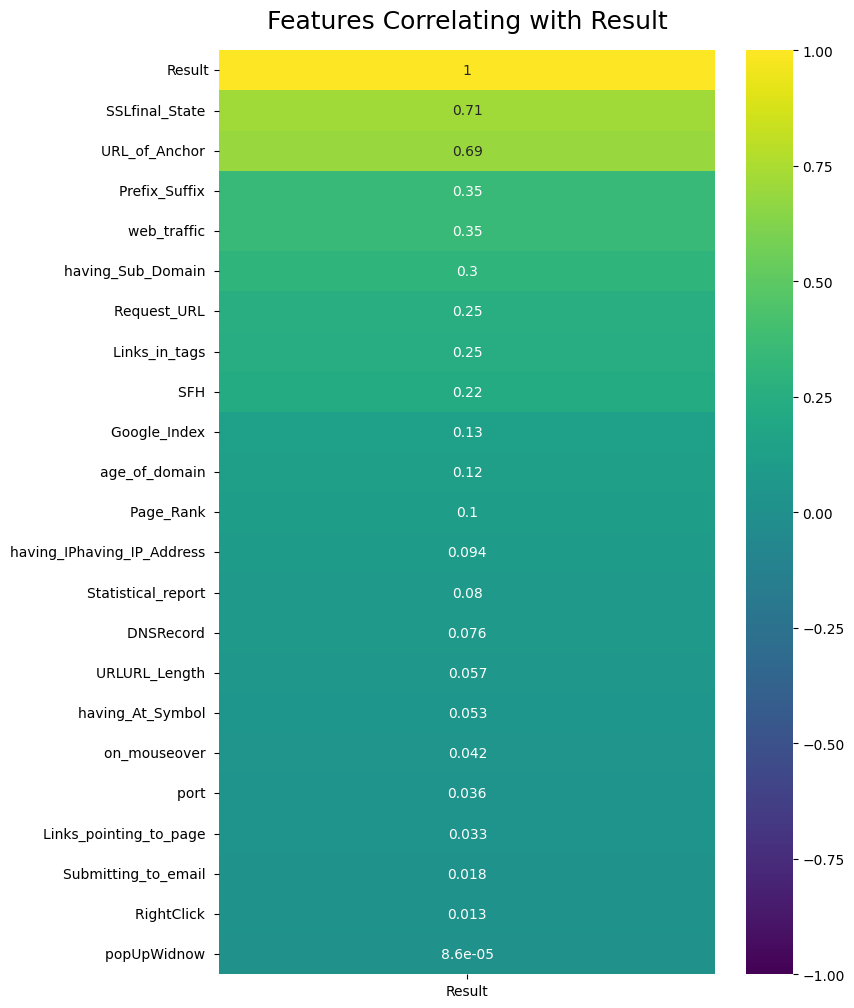

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(filtered_phishing_data.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

# MODELS

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from time import perf_counter

In [17]:
def binary_classification_accuracy(actual, pred):
    print(f'Accuracy score: \n{accuracy_score(actual, pred)}')
    
target = filtered_phishing_data['Result']
features = filtered_phishing_data.drop(columns=['Result'])

# Define the number of splits for KFold
n_splits = 10 
folds = KFold(n_splits=n_splits, shuffle=True, random_state = 2)

# MODEL 01: SVM

==== FOLD 1 ====
Accuracy score: 0.906871609403255
==== FOLD 2 ====
Accuracy score: 0.9276672694394213
==== FOLD 3 ====
Accuracy score: 0.9222423146473779
==== FOLD 4 ====
Accuracy score: 0.9195298372513563
==== FOLD 5 ====
Accuracy score: 0.918625678119349
==== FOLD 6 ====
Accuracy score: 0.9276018099547512
==== FOLD 7 ====
Accuracy score: 0.9194570135746606
==== FOLD 8 ====
Accuracy score: 0.934841628959276
==== FOLD 9 ====
Accuracy score: 0.9248868778280543
==== FOLD 10 ====
Accuracy score: 0.9330316742081448
Summed Confusion Matrix over all folds:
[[4368.  530.]
 [ 316. 5841.]]


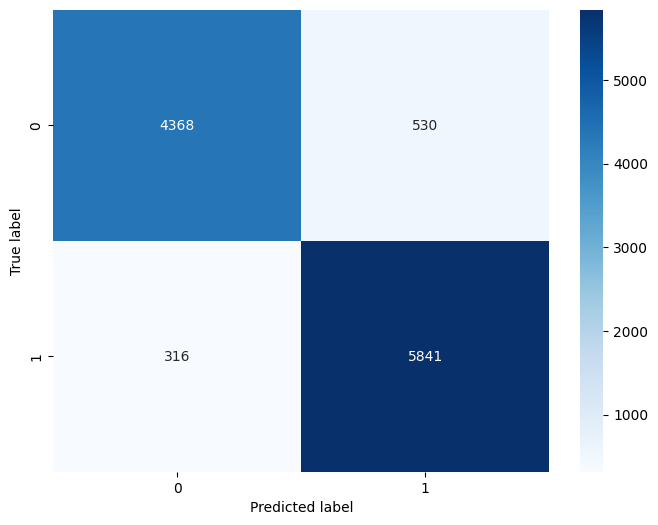

In [18]:
accuracy_scores_svm = []
duration_svm =[]
conf_matrix_sum = np.zeros((2, 2))  # Assuming binary classification
features_array = features.values
target_array = target.values



from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from time import perf_counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



for fold, (train_idx, validation_idx) in enumerate(folds.split(features_array, target_array)):
    start = perf_counter()

    # Train the model
    model = SVC(kernel='rbf', C=10, gamma=0.001)
    model.fit(features_array[train_idx], target_array[train_idx])

    # Predict and evaluate
    predicted_values = model.predict(features_array[validation_idx])
    accuracy = accuracy_score(target_array[validation_idx], predicted_values)
    accuracy_scores_svm.append(accuracy)

    # Compute confusion matrix and add to the sum
    conf_matrix = confusion_matrix(target_array[validation_idx], predicted_values)
    conf_matrix_sum += conf_matrix

    # Print fold results
    print(f'==== FOLD {fold+1} ====')
    print(f'Accuracy score: {accuracy}')

    # Duration
    duration = perf_counter() - start
    duration_svm.append(duration)

# Print the summed confusion matrix
print("Summed Confusion Matrix over all folds:")
print(conf_matrix_sum)

# Plotting the summed confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sum, annot=True, fmt='g', cmap='Blues')
# plt.title('Summed Confusion Matrix over all folds')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



In [19]:
accuracy_scores_svm

[0.906871609403255,
 0.9276672694394213,
 0.9222423146473779,
 0.9195298372513563,
 0.918625678119349,
 0.9276018099547512,
 0.9194570135746606,
 0.934841628959276,
 0.9248868778280543,
 0.9330316742081448]

In [20]:
duration_svm

[0.5485876659950009,
 0.5660308339938638,
 0.5418504580011358,
 0.531224292004481,
 0.544815708999522,
 0.5469321659984416,
 0.5394056250006543,
 0.5515432090032846,
 0.5390950830042129,
 0.5450491669980693]

# MODEL 02: RANDOM FORREST

Aggregated Confusion Matrix for Random Forest over all folds:
[[4357.  541.]
 [ 309. 5848.]]


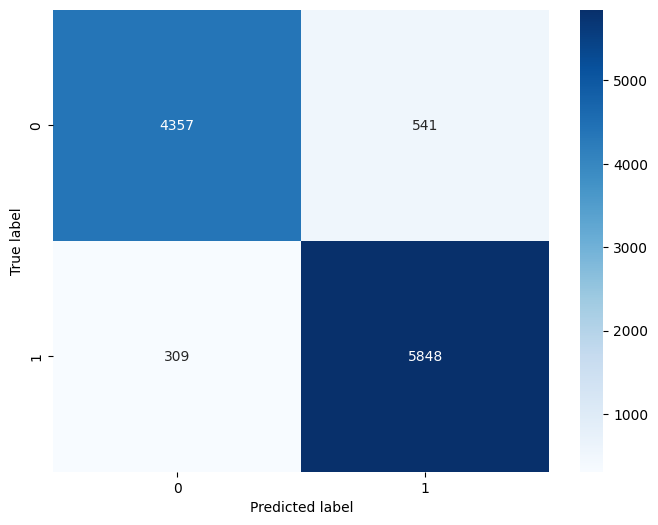

In [21]:
accuracy_scores_rf = []
duration_rf =[]

features_array = features.values
target_array = target.values





from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from time import perf_counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



conf_matrix_sum_rf = np.zeros((2, 2))  # Adjust the size if you have more classes

for fold, (train_idx, test_idx) in enumerate(folds.split(features_array, target_array)):
    start = perf_counter()

    # Create and train the Random Forest model
    model = RandomForestClassifier(
        max_depth=3,
        max_features='sqrt',
        min_samples_leaf=2,
        min_samples_split=5,
        n_estimators=10,
        random_state=2
    )
    model.fit(features_array[train_idx], target_array[train_idx])

    # Predict on the test set
    predictions = model.predict(features_array[test_idx])

    # Calculate accuracy and duration
    accuracy = accuracy_score(target_array[test_idx], predictions)
    accuracy_scores_rf.append(accuracy)
    duration = perf_counter() - start
    duration_rf.append(duration)

    # Compute and sum the confusion matrix
    conf_matrix = confusion_matrix(target_array[test_idx], predictions)
    conf_matrix_sum_rf += conf_matrix

# Print and plot the summed confusion matrix
print("Aggregated Confusion Matrix for Random Forest over all folds:")
print(conf_matrix_sum_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sum_rf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [22]:
accuracy_scores_rf

[0.9122965641952984,
 0.9213381555153707,
 0.9195298372513563,
 0.9222423146473779,
 0.9267631103074141,
 0.934841628959276,
 0.9176470588235294,
 0.9339366515837104,
 0.9194570135746606,
 0.9230769230769231]

In [23]:
duration_rf

[0.035368082993954886,
 0.024100750000798143,
 0.03751954100152943,
 0.018739124992862344,
 0.0186314169986872,
 0.018209207999461796,
 0.02063099999941187,
 0.017290249998040963,
 0.018589749997772742,
 0.01826837500266265]

# MODEL 03: XGBOOST

Aggregated Confusion Matrix for XGBoost over all folds:
[[4698.  200.]
 [ 146. 6011.]]


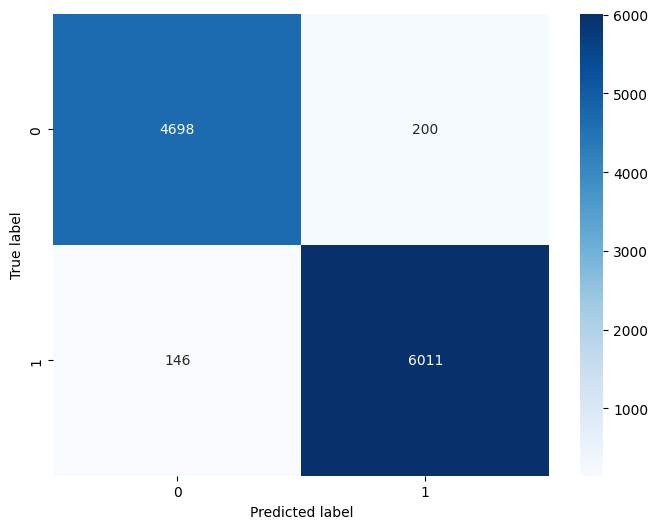

In [24]:
accuracy_scores_xgb = []
duration_xgb =[]
folds = KFold(n_splits=n_splits, shuffle=True, random_state = 4)


from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
from time import perf_counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


conf_matrix_sum_xgb = np.zeros((2, 2))  # Adjust the size if you have more classes

for fold, (train_idx, test_idx) in enumerate(folds.split(features_array, target_array)):
    start = perf_counter()

    # Create and train the XGBoost model
    model = XGBClassifier()
    model.fit(features_array[train_idx], target_array[train_idx])

    # Predict on the test set
    predictions = model.predict(features_array[test_idx])

    # Calculate accuracy and duration
    accuracy = accuracy_score(target_array[test_idx], predictions)
    accuracy_scores_xgb.append(accuracy)
    duration = perf_counter() - start
    duration_xgb.append(duration)

    # Compute and sum the confusion matrix
    conf_matrix = confusion_matrix(target_array[test_idx], predictions)
    conf_matrix_sum_xgb += conf_matrix

# Print and plot the summed confusion matrix
print("Aggregated Confusion Matrix for XGBoost over all folds:")
print(conf_matrix_sum_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sum_xgb, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [25]:
accuracy_scores_xgb

[0.9656419529837251,
 0.976491862567812,
 0.972875226039783,
 0.9656419529837251,
 0.969258589511754,
 0.9683257918552036,
 0.9728506787330317,
 0.9656108597285068,
 0.9619909502262444,
 0.9683257918552036]

In [26]:
duration_xgb

[0.15972524999961024,
 0.10294854200037662,
 0.08335116599482717,
 0.07362316599756014,
 0.07494437500281492,
 0.07794341599947074,
 0.09051166699646274,
 0.07858979199954774,
 0.0698646250020829,
 0.07182250000187196]

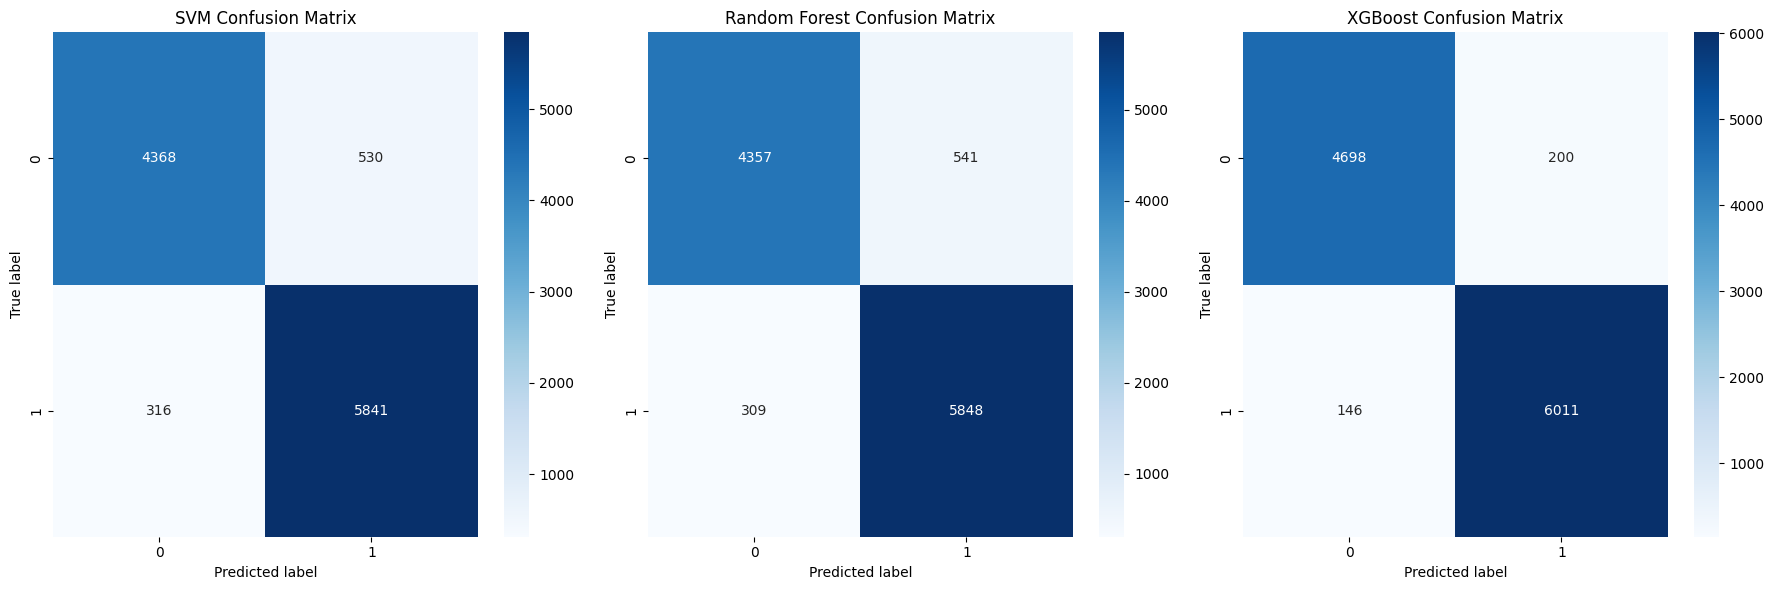

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming conf_matrix_sum, conf_matrix_sum_rf, and conf_matrix_sum_xgb are the summed confusion matrices
# for SVM, Random Forest, and XGBoost respectively. Replace these with your actual matrices.

# Simulating confusion matrices for demonstration purposes
# conf_matrix_sum = np.array([[50, 10], [15, 25]])
# conf_matrix_sum_rf = np.array([[45, 15], [10, 30]])
# conf_matrix_sum_xgb = np.array([[55, 5], [20, 20]])

# Plotting all confusion matrices side by side
plt.figure(figsize=(18, 6))

# SVM Confusion Matrix
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.heatmap(conf_matrix_sum, annot=True, fmt='g', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Random Forest Confusion Matrix
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.heatmap(conf_matrix_sum_rf, annot=True, fmt='g', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# XGBoost Confusion Matrix
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.heatmap(conf_matrix_sum_xgb, annot=True, fmt='g', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show the plot
plt.tight_layout()
plt.show()


## Accuracy of three models together

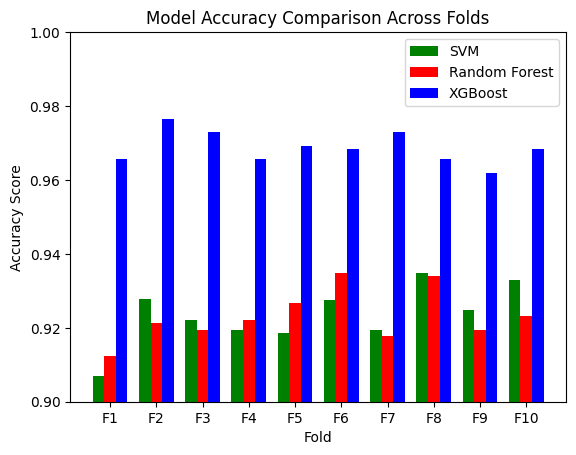

In [28]:
# Number of folds
n_folds = len(accuracy_scores_xgb)

# Creating x locations for the groups on the x-axis
fold_indices = np.arange(n_folds)

# Width of the bars
bar_width = 0.25

# Create a bar plot to display the accuracy scores for each fold
fig, ax = plt.subplots()

# Plotting each model's accuracy scores
ax.bar(fold_indices - bar_width, accuracy_scores_svm, bar_width, label='SVM', color='green')
ax.bar(fold_indices, accuracy_scores_rf, bar_width, label='Random Forest', color='red')
ax.bar(fold_indices + bar_width, accuracy_scores_xgb, bar_width, label='XGBoost', color='blue')

# Adding labels and title
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy Score')
ax.set_title('Model Accuracy Comparison Across Folds')
ax.set_xticks(fold_indices)
ax.set_xticklabels([f'F{i+1}' for i in range(n_folds)])
ax.legend()
# Setting y-axis limits to show accuracy from 0.5 to 1
ax.set_ylim(0.9, 1)
# Display the plot
plt.show()



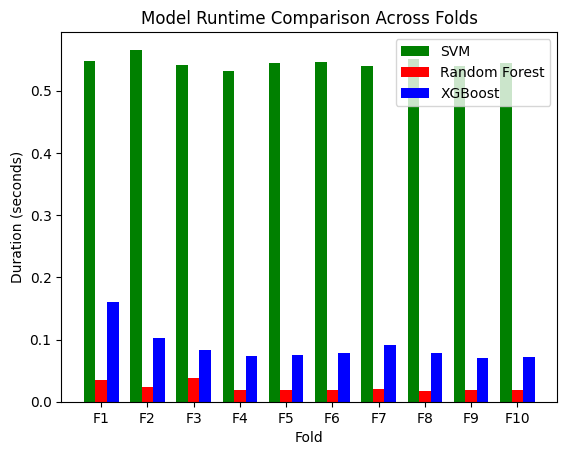

In [29]:
# Number of folds
n_folds = len(duration_svm) 

# Creating x locations for the groups on the x-axis
fold_indices = np.arange(n_folds)

# Width of the bars
bar_width = 0.25

# Create a bar plot to display the duration scores for each fold
fig, ax = plt.subplots()

# Plotting each model's duration scores
ax.bar(fold_indices - bar_width, duration_svm, bar_width, label='SVM', color='green')
ax.bar(fold_indices, duration_rf, bar_width, label='Random Forest', color='red')
ax.bar(fold_indices + bar_width, duration_xgb, bar_width, label='XGBoost', color='blue')

# Adding labels and title
ax.set_xlabel('Fold')
ax.set_ylabel('Duration (seconds)')
ax.set_title('Model Runtime Comparison Across Folds')
ax.set_xticks(fold_indices)
ax.set_xticklabels([f'F{i+1}' for i in range(n_folds)])
ax.legend()

# Display the plot
plt.show()


---

# Anova

In [30]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [31]:
f_statistic, p_value = stats.f_oneway(accuracy_scores_svm, accuracy_scores_rf, accuracy_scores_xgb)
print(f'F-Statistic: {f_statistic:.5f}, P-Value: {p_value}')

# Check if the p-value is less than 0.05 to determine if the differences are statistically significant
if p_value < 0.05:
    print("The differences between the models are statistically significant.")
else:
    print("The differences between the models are not statistically significant.")

F-Statistic: 154.15584, P-Value: 1.6976714978278632e-15
The differences between the models are statistically significant.


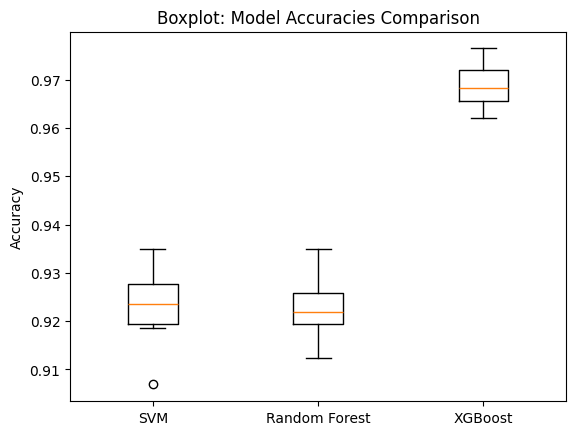

In [32]:
def calculate_confidence_interval(data):
    mean = np.mean(data)
    std_error = stats.sem(data)
    confidence_interval = stats.t.interval(0.95, len(data)-1, loc=mean, scale=std_error)
    return confidence_interval


all_accuracies = [accuracy_scores_svm, accuracy_scores_rf, accuracy_scores_xgb]
plt.boxplot(all_accuracies, labels=['SVM', 'Random Forest', 'XGBoost'])
plt.title('Boxplot: Model Accuracies Comparison')
plt.ylabel('Accuracy')
# plt.xlabel('Model')
plt.show()

In [33]:
ci_svm = calculate_confidence_interval(accuracy_scores_svm)
ci_rf = calculate_confidence_interval(accuracy_scores_rf)
ci_xgb = calculate_confidence_interval(accuracy_scores_xgb)

print(f'Confidence Interval for SVM\t\t: ({ci_svm[0]:.5f}, {ci_svm[1]:.5f})')
print(f'Confidence Interval for Random Forest\t: ({ci_rf[0]:.5f}, {ci_rf[1]:.5f})')
print(f'Confidence Interval for XGBoost\t\t: ({ci_xgb[0]:.5f}, {ci_xgb[1]:.5f})')


Confidence Interval for SVM		: (0.91769, 0.92927)
Confidence Interval for Random Forest	: (0.91808, 0.92814)
Confidence Interval for XGBoost		: (0.96560, 0.97180)


---

# Contrast Approach

In [34]:
from scipy import stats
import numpy as np

# Provided accuracies from the screenshots
accuracies_a = accuracy_scores_svm
accuracies_b = accuracy_scores_rf
accuracies_c = accuracy_scores_xgb

# Calculate the means for each algorithm
mean_a = np.mean(accuracies_a)
mean_b = np.mean(accuracies_b)
mean_c = np.mean(accuracies_c)

# Total mean across all algorithms
total_mean = np.mean([mean_a, mean_b, mean_c])

# Calculate effects for each algorithm
effect_a = mean_a - total_mean
effect_b = mean_b - total_mean
effect_c = mean_c - total_mean

print(f'Mean for Algorithm A\t: {mean_a:.5f}')
print(f'Mean for Algorithm B\t: {mean_b:.5f}')
print(f'Mean for Algorithm C\t: {mean_c:.5f}')
print(f'Total Mean\t\t: {total_mean:.5f}')
print(f'Effect for Algorithm A\t: {effect_a:.5f}')
print(f'Effect for Algorithm B\t: {effect_b:.5f}')
print(f'Effect for Algorithm C\t: {effect_c:.5f}')

Mean for Algorithm A	: 0.92348
Mean for Algorithm B	: 0.92311
Mean for Algorithm C	: 0.96870
Total Mean		: 0.93843
Effect for Algorithm A	: -0.01495
Effect for Algorithm B	: -0.01532
Effect for Algorithm C	: 0.03027


In [35]:
# Number of algorithms and number of observations per algorithm
k = 3  # Number of algorithms
n = len(accuracies_a)  # Number of observations per algorithm

# Sum of Squares for Algorithms (SSA)
ssa = n * (effect_a**2 + effect_b**2 + effect_c**2)

# Total Sum of Squares (SST)
sst = np.sum((accuracies_a - total_mean)**2) + np.sum((accuracies_b - total_mean)**2) + np.sum((accuracies_c - total_mean)**2)

# Percentage of variation due to algorithms
percentage_variation_algorithms = (ssa / sst) * 100

# Sum of Squares for Error (SSE)
sse = sst - ssa

# Percentage of variation due to errors/noise
percentage_variation_errors = (sse / sst) * 100

# Variance estimates
variance_a = ssa / (k - 1)
variance_e = sse / (k * (n - 1))

# F-statistic
f_statistic = variance_a / variance_e

# F-critical from ANOVA table for alpha = 0.01, (2, 27) degrees of freedom
f_critical = stats.f.ppf(1 - 0.01, dfn=k-1, dfd=k*(n-1))
print(f'F-Statistic: {f_statistic:.5f}, f_critical: {f_critical:.5f}')

# Check if F-statistic is greater than F-critical
if f_statistic > f_critical:
    print("The differences among the algorithms are statistically significant at α = 0.01.")
else:
    print("The differences among the algorithms are not statistically significant at α = 0.01.")

F-Statistic: 154.15584, f_critical: 5.48812
The differences among the algorithms are statistically significant at α = 0.01.


In [36]:
# Weights for each comparison (provided effects)
weights_ab = np.array([1, -1, 0])
weights_bc = np.array([0, 1, -1])
weights_ac = np.array([1, 0, -1])

# Calculate contrasts
contrast_ab = effect_a - effect_b
contrast_bc = effect_b - effect_c
contrast_ac = effect_a - effect_c

# Calculate the standard error
se = np.sqrt(sse / (k * (n - 1)))

# Calculate contrast standard errors
sc_ab = np.sqrt((weights_ab[0]**2 + weights_ab[1]**2) * se**2 / (k*n))
sc_bc = np.sqrt((weights_bc[1]**2 + weights_bc[2]**2) * se**2 / (k*n))
sc_ac = np.sqrt((weights_ac[0]**2 + weights_ac[2]**2) * se**2 / (k*n))

# Critical t-value for alpha = 0.01 with 27 degrees of freedom (two-tailed)
t_critical = stats.t.ppf(1 - 0.01/2, df=k*(n-1))

# Calculate confidence intervals for each contrast
ci_ab = (contrast_ab - t_critical * sc_ab, contrast_ab + t_critical * sc_ab)
ci_bc = (contrast_bc - t_critical * sc_bc, contrast_bc + t_critical * sc_bc)
ci_ac = (contrast_ac - t_critical * sc_ac, contrast_ac + t_critical * sc_ac)

# Print the results
print(f'T Critial\t\t:{t_critical:.5f}')
print(f'Constrast A vs B\t: {contrast_ab:.5f}')
print(f'Constrast B vs C\t: {contrast_bc:.5f}')
print(f'Constrast A vs C\t: {contrast_ac:.5f}')
print(f'SC A vs B\t\t: {sc_ab:.5f}')
print(f'SC B vs C\t\t: {sc_bc:.5f}')
print(f'SC A vs C\t\t: {sc_ac:.5f}')
print(f'Confidence Interval for A vs B: ({ci_ab[0]:.5f}, {ci_ab[1]:.5f})')
print(f'Confidence Interval for B vs C: ({ci_bc[0]:.5f}, {ci_bc[1]:.5f})')
print(f'Confidence Interval for A vs C: ({ci_ac[0]:.5f}, {ci_ac[1]:.5f})')

T Critial		:2.77068
Constrast A vs B	: 0.00036
Constrast B vs C	: -0.04559
Constrast A vs C	: -0.04523
SC A vs B		: 0.00172
SC B vs C		: 0.00172
SC A vs C		: 0.00172
Confidence Interval for A vs B: (-0.00441, 0.00514)
Confidence Interval for B vs C: (-0.05037, -0.04081)
Confidence Interval for A vs C: (-0.05000, -0.04045)


-----

# END